Iniciando processamento da imagem única...


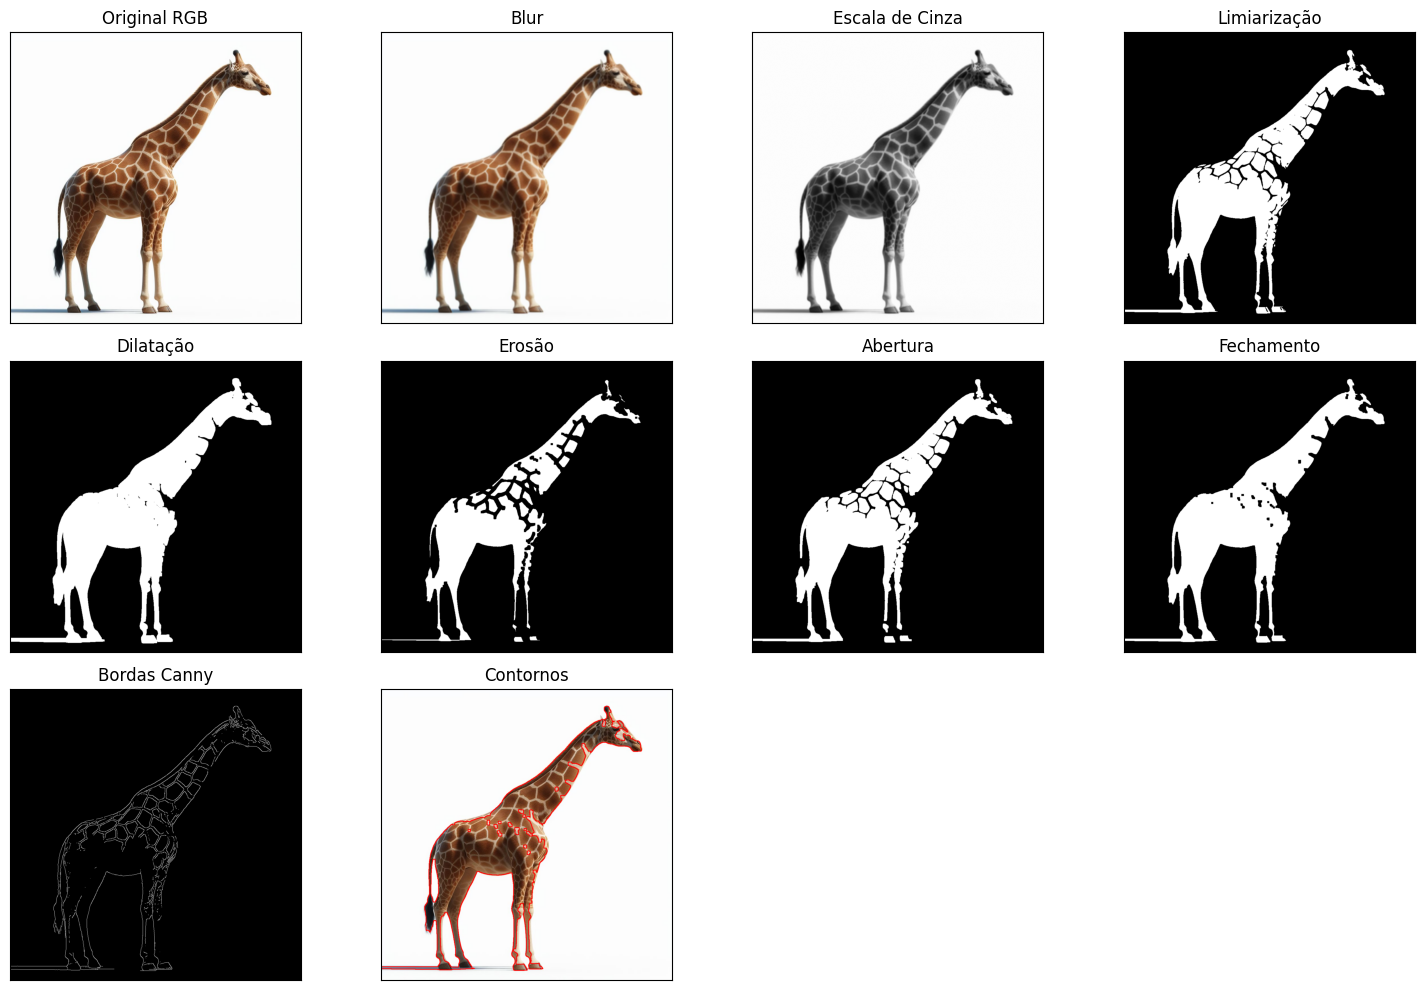

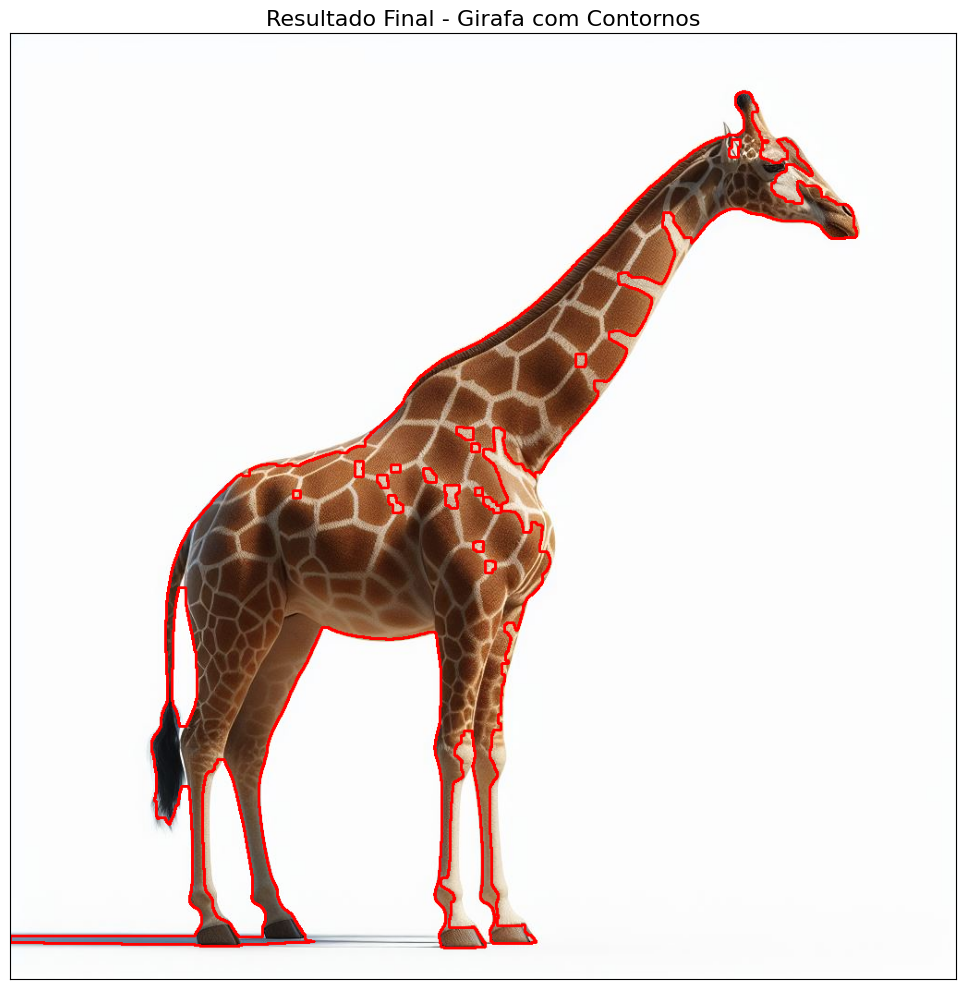

Processamento da imagem GIRAFA.jpeg concluído!
Imagens salvas: GIRAFA_intermediarias.png e GIRAFA_final.png


array([[[249, 253, 255],
        [249, 253, 255],
        [249, 253, 255],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       [[249, 253, 255],
        [249, 253, 255],
        [249, 253, 255],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       [[249, 253, 255],
        [249, 253, 255],
        [249, 253, 255],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

def analisar_imagem(caminho_imagem, titulo_da_analise):
    """
    Realiza uma série de operações de processamento em uma imagem,
    exibindo os resultados intermediários e o contorno final.

    Args:
        caminho_imagem (str): O caminho para o arquivo da imagem.
        titulo_da_analise (str): Um título descritivo para a análise da imagem.

    Returns:
        numpy.ndarray: A imagem final com os contornos desenhados.
    """

    # Carrega a imagem e converte para o espaço de cores RGB
    img_bgr = cv2.imread(caminho_imagem)
    img_rgb_convertida = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Aplica um filtro de desfoque para suavizar a imagem
    imagem_suavizada = cv2.blur(img_rgb_convertida, (5, 5))

    # Converte a imagem suavizada para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem_suavizada, cv2.COLOR_RGB2GRAY)

    # Calcula o valor máximo de pixel e aplica limiarização
    valor_max_pixel = imagem_cinza.max()
    _, imagem_limiarizada = cv2.threshold(imagem_cinza, valor_max_pixel / 2 + 30, valor_max_pixel, cv2.THRESH_BINARY_INV)

    # Define um elemento estruturante (kernel) para operações morfológicas
    elemento_estruturante = np.ones((7, 7), np.uint8)

    # Realiza operações morfológicas: dilatação, erosão, abertura e fechamento
    imagem_dilatada = cv2.dilate(imagem_limiarizada, elemento_estruturante, iterations=1)
    imagem_erodida = cv2.erode(imagem_limiarizada, elemento_estruturante, iterations=1)
    imagem_aberta = cv2.morphologyEx(imagem_limiarizada, cv2.MORPH_OPEN, elemento_estruturante)
    imagem_fechada = cv2.morphologyEx(imagem_limiarizada, cv2.MORPH_CLOSE, elemento_estruturante)

    # Detecta bordas usando o algoritmo Canny
    bordas_detectadas = cv2.Canny(image=imagem_cinza, threshold1=valor_max_pixel / 2, threshold2=valor_max_pixel / 2)

    # Encontra contornos na imagem fechada
    lista_contornos, _ = cv2.findContours(
        image=imagem_fechada,
        mode=cv2.RETR_TREE,
        method=cv2.CHAIN_APPROX_SIMPLE
    )

    # Ordena os contornos por área, do maior para o menor
    lista_contornos = sorted(lista_contornos, key=cv2.contourArea, reverse=True)

    # Desenha os contornos na imagem RGB original
    imagem_com_contornos = img_rgb_convertida.copy()
    resultado_final = cv2.drawContours(imagem_com_contornos, lista_contornos, contourIdx=-1, color=(255, 0, 0), thickness=2)

    # Lista de imagens intermediárias para visualização
    etapas_processamento = [
        img_rgb_convertida, imagem_suavizada, imagem_cinza, imagem_limiarizada,
        imagem_dilatada, imagem_erodida, imagem_aberta, imagem_fechada, bordas_detectadas, resultado_final
    ]

    # Títulos para as imagens intermediárias
    titulos_etapas = [
        'RGB Original', 'Desfoque', 'Tons de Cinza', 'Limiarizada',
        'Dilatada', 'Erodida', 'Abertura Morfológica', 'Fechamento Morfológico', 'Bordas Canny', 'Contornos Detectados'
    ]

    # Calcula o layout ideal para a grade de exibição
    num_etapas = len(etapas_processamento)
    cols = math.ceil(num_etapas ** 0.5)
    rows = cols - 1 if (cols**2 - num_etapas) > cols else cols

    # Exibe as imagens intermediárias em uma grade
    plt.figure(figsize=(15, 10))
    for i in range(num_etapas):
        plt.subplot(rows, cols, i + 1)
        # Exibe em RGB para imagens coloridas ou em tons de cinza para as demais
        if i in [0, 1, 9]:
            plt.imshow(etapas_processamento[i])
        else:
            plt.imshow(etapas_processamento[i], cmap='gray')
        plt.title(titulos_etapas[i])
        plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.savefig(f'{caminho_imagem.split(".")[0]}_etapas.png')
    plt.show()

    # Exibe a imagem final com os contornos
    plt.figure(figsize=(12, 10))
    plt.imshow(resultado_final)
    plt.title(f'Resultado Final: {titulo_da_analise} com Contornos', fontsize=16)
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.savefig(f'{caminho_imagem.split(".")[0]}_contornos_finais.png')
    plt.show()

    print(f"Análise da imagem '{caminho_imagem}' concluída com sucesso!")
    print(f"Resultados salvos: '{caminho_imagem.split('.')[0]}_etapas.png' e '{caminho_imagem.split('.')[0]}_contornos_finais.png'")

    return resultado_final

# --- Exemplo de Uso ---
if __name__ == "__main__":
    nome_do_arquivo_imagem = 'GIRAFA.jpeg' # Você pode alterar para 'AVIAO_01.jpg' ou outro arquivo
    rotulo_para_analise = 'Girafa' # Título associado à imagem
    print("Iniciando o processo de análise de imagem...")
    imagem_processada = analisar_imagem(nome_do_arquivo_imagem, rotulo_para_analise)